In this notebook, I applied different regression techniques to predict the data of calories burned in the exercises from the knowledge of duration (t), heart rate (h), body temperature (T), age (A), weight (W), height (H) and gender (G). It was verified that the variable that most influences the burning of calories is duration, followed by heart rate and body temperature.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import numpy 
import pandas 
import matplotlib
import seaborn

In [3]:
print(numpy.__version__)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)

1.19.5
1.2.4
3.3.4
0.11.1


In [4]:
df1=pd.read_csv('calories.csv')
df2=pd.read_csv('exercise.csv')

In [5]:
print(df1.head())
print(df2.tail())

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5


In [6]:
### Merging the two dataframes
data=pd.merge(df1,df2,on='User_ID')

In [7]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


#### Exploratory Data Analysis(EDA)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [9]:
data.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [10]:
data.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [11]:
data.shape

(15000, 9)

In [12]:
data.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [17]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

### Data Visualization

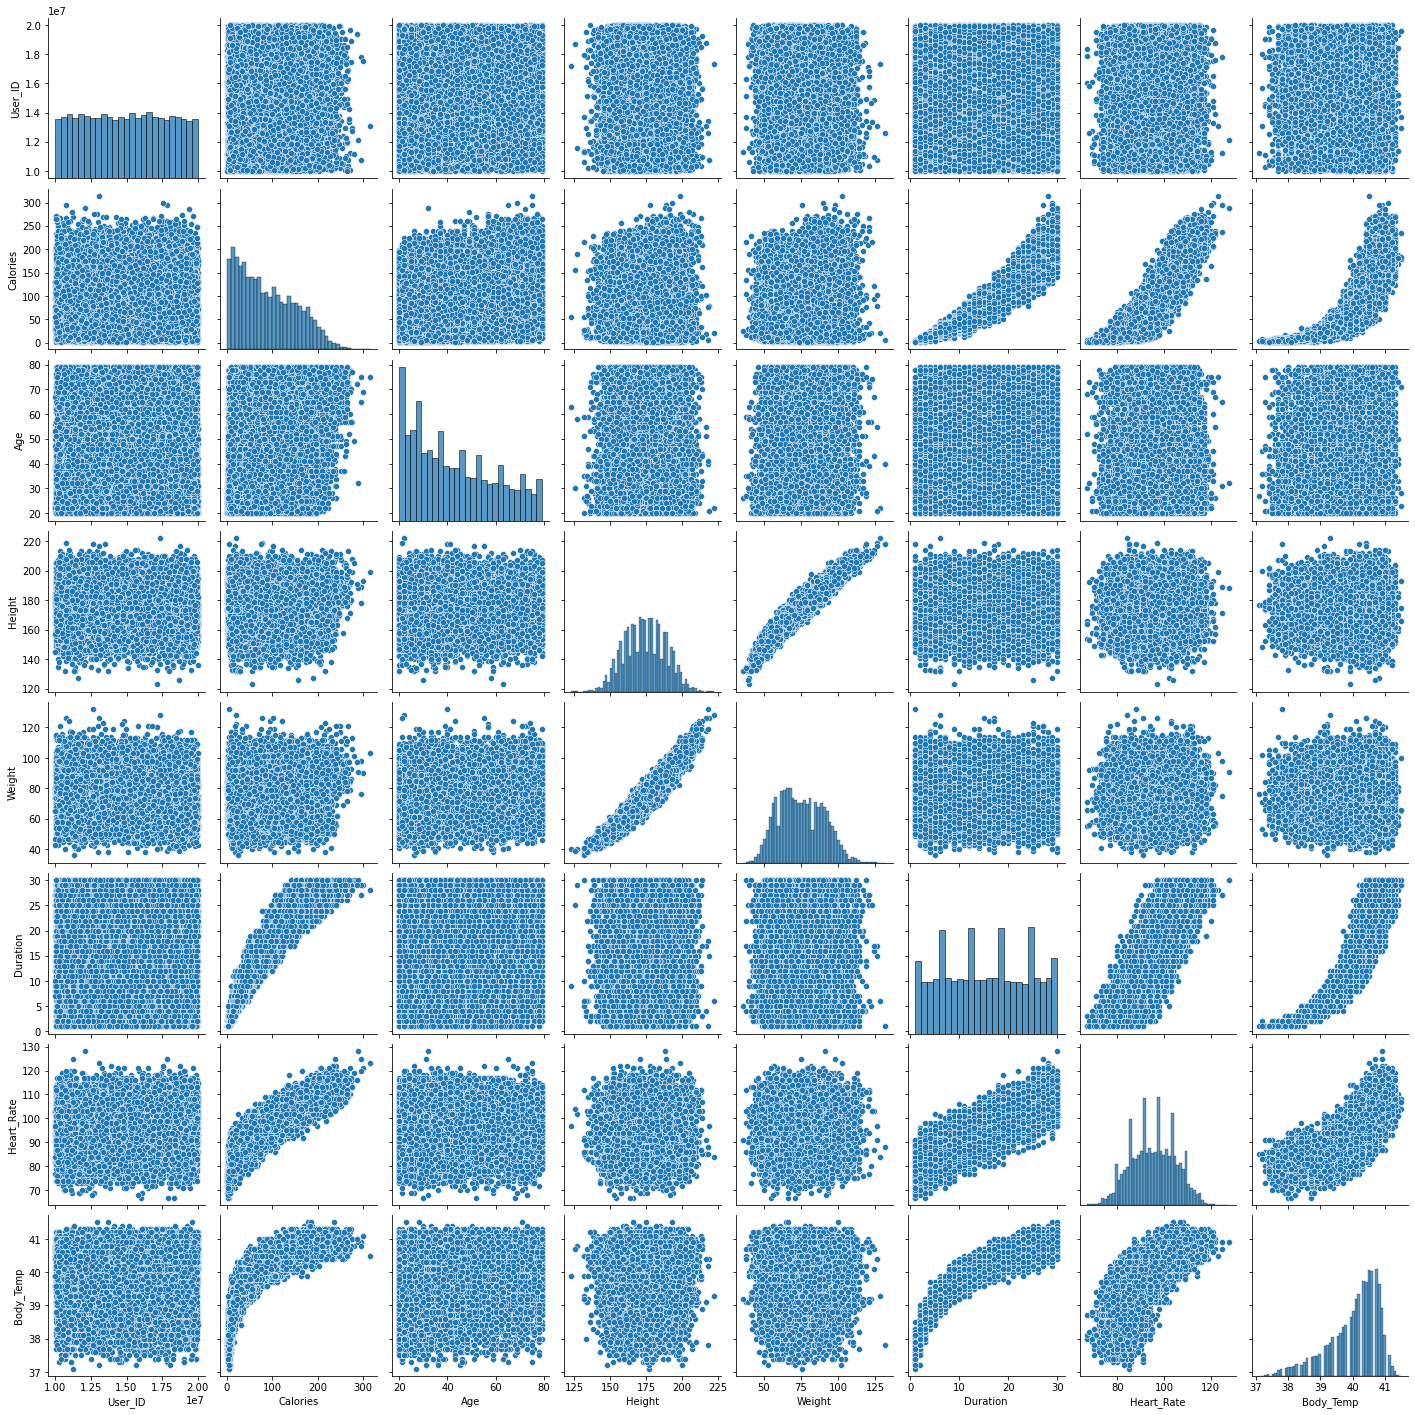

In [22]:
sns.pairplot(data)

In [25]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Gender'].unique()

array([1, 0])

C:\Users\Manikanta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

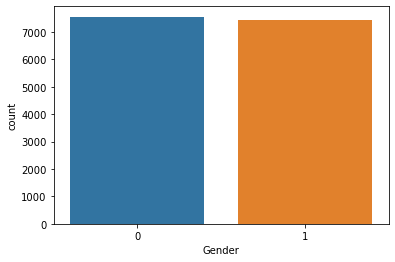

In [26]:
sns.countplot(data['Gender'])

In [27]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,0,27,154.0,58.0,10.0,81.0,39.8


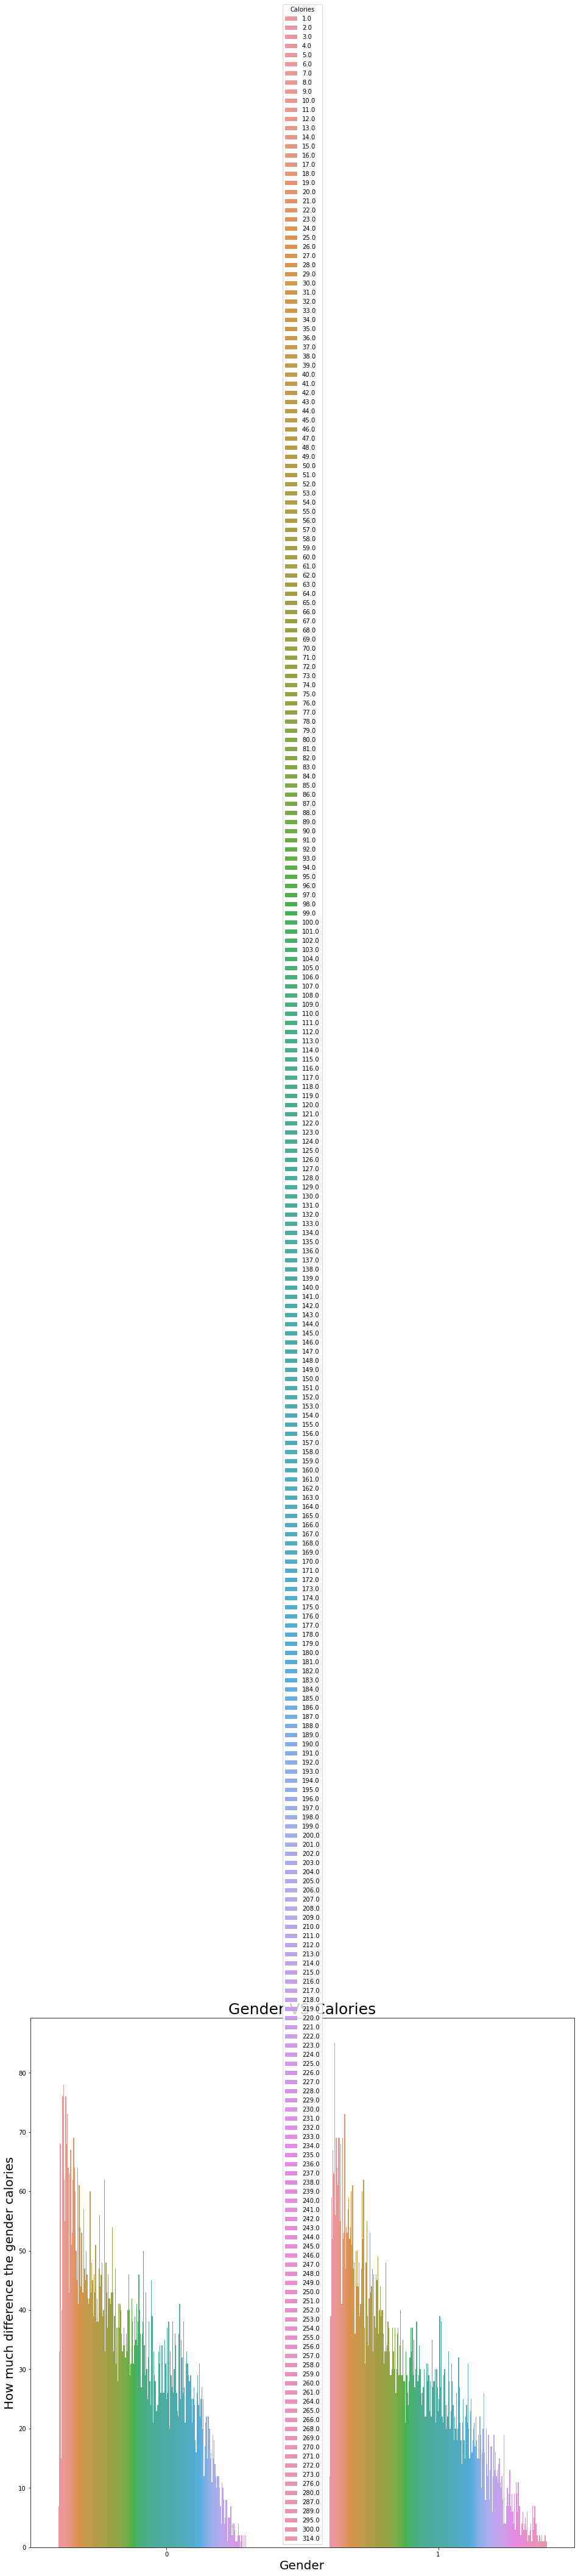

In [28]:
plt.figure(figsize=(16,16))

sns.countplot(x=data['Gender'],hue=data['Calories'])
plt.title("Gender VS Calories",fontsize=25)
plt.ylabel("How much difference the gender calories",fontsize=20)
plt.xlabel("Gender",fontsize=20)
plt.show()

#### Split the data

In [29]:
X = data.drop(['User_ID','Calories'], axis=1)
Y = data['Calories']

In [30]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [31]:
Y.tail()

14995    45.0
14996    23.0
14997    75.0
14998    11.0
14999    98.0
Name: Calories, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.10,random_state=42)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13500, 7)
(13500,)
(1500, 7)
(1500,)


### Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr

Ridge()

In [36]:
rr.fit(X_train,y_train)

Ridge()

In [37]:
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))

0.9672159445412584
0.9670096282501581


In [38]:
rr_pred=rr.predict(X_test)

In [43]:
rr_pr=pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":rr_pred})[0:5]
rr_pr

,Actual Rating,Predicted Rating
11499,173.0,170.639980
6475,189.0,192.261157
13167,53.0,56.123872
862,161.0,155.673462
5970,226.0,212.363716


In [45]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for Ridge :",rr_score)
rr_mae=mean_absolute_error(y_test,rr_pred)*100
print("Mean absolute error for Ridge:",rr_mae)
rr_mse=mean_squared_error(y_test,rr_pred)*100
print("Mean squared error for Ridge",rr_mse)

Accuracy score for Ridge : 96.70096282501581
Mean absolute error for Ridge: 823.6921296352159
Mean squared error for Ridge 12959.493608331488


#### Lasso

In [46]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr

Lasso()

In [47]:
lr.fit(X_train,y_train)

Lasso()

In [48]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9643937046681283
0.9639472392831163


In [49]:
lr_pred=lr.predict(X_test)

In [50]:
pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":lr_pred})[0:5]

,Actual Rating,Predicted Rating
11499,173.0,167.879688
6475,189.0,185.262667
13167,53.0,60.412375
862,161.0,155.331635
5970,226.0,211.970237


In [52]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr_score=r2_score(y_test,lr_pred)*100
print("Accuracy score for Lasso :",lr_score)
lr_mae=mean_absolute_error(y_test,lr_pred)*100
print("Mean absolute error for Lasso:",lr_mae)
lr_mse=mean_squared_error(y_test,lr_pred)*100
print("Mean squared error for Lasso",lr_mse)

Accuracy score for Lasso : 96.39472392831163
Mean absolute error for Lasso: 873.0599017052617
Mean squared error for Lasso 14162.481272294175


#### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [54]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [55]:
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))

0.9672159484489461
0.9670097908652697


In [56]:
#### New Predict
lin_reg_pred=lin_reg.predict(X_test)


In [90]:
pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":lin_reg_pred})[0:5]

,Actual Rating,Predicted Rating
11499,173.0,170.643440
6475,189.0,192.269007
13167,53.0,56.119082
862,161.0,155.672859
5970,226.0,212.364631


In [91]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lin_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LinearRegression :",lin_score)
lin_mae=mean_absolute_error(y_test,lin_reg_pred)
print("Mean absolute error for LinearRegression:",lin_mae)
lin_mse=mean_squared_error(y_test,lin_reg_pred)
print("Mean squared error for LinearRegression",lin_mse)

Accuracy score for LinearRegression : 96.70097908652697
Mean absolute error for LinearRegression: 8.237029402024573
Mean squared error for LinearRegression 129.59429728799725


#### support vector Regression

In [92]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [93]:
print(svr.score(X_train,y_train))
print(svr.score(X_test,y_test))

0.9449332835221592
0.9411391602968397


In [94]:
svr_pred=svr.predict(X_test)

In [95]:
pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":svr_pred})[0:5]

,Actual Rating,Predicted Rating
11499,173.0,156.427168
6475,189.0,164.263385
13167,53.0,58.705331
862,161.0,145.561609
5970,226.0,199.128039


In [96]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for SVR :",svr_score)
svr_mae=mean_absolute_error(y_test,svr_pred)
print("Mean absolute error for SVR:",svr_mae)
svr_mse=mean_squared_error(y_test,svr_pred)
print("Mean squared error for SVR",svr_mse)

Accuracy score for SVR : 94.11391602968398
Mean absolute error for SVR: 10.247939027998893
Mean squared error for SVR 231.22100038711588


### DecisionTree Regression


In [97]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [98]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.9314264424630422
0.9305524457463296


In [99]:
dt_pred=dt.predict(X_test)

In [100]:
pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":dt_pred})[0:5]

,Actual Rating,Predicted Rating
11499,173.0,177.094793
6475,189.0,188.047497
13167,53.0,57.232691
862,161.0,188.047497
5970,226.0,214.674651


In [101]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
dt_score=r2_score(y_test,dt_pred)*100
print("Accuracy score for DTRegression :",dt_score)
dt_mae=mean_absolute_error(y_test,dt_pred)
print("Mean absolute error for DTRegression:",dt_mae)
dt_mse=mean_squared_error(y_test,dt_pred)
print("Mean squared error for DTRegression",dt_mse)

Accuracy score for DTRegression : 93.05524457463295
Mean absolute error for DTRegression: 12.407312960017281
Mean squared error for DTRegression 272.80842492143466


### RandomForest Regression


In [102]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [103]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9997172742600788
0.9983489193670417


In [104]:
rf_pred=rf.predict(X_test)

In [105]:
pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":rf_pred})[0:5]

,Actual Rating,Predicted Rating
11499,173.0,171.98
6475,189.0,191.08
13167,53.0,52.93
862,161.0,160.19
5970,226.0,221.25


In [106]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rf_score=r2_score(y_test,rf_pred)*100
print("Accuracy score for RandomForest :",rf_score)
rf_mae=mean_absolute_error(y_test,rf_pred)
print("Mean absolute error for RandomForest:",rf_mae)
rf_mse=mean_squared_error(y_test,rf_pred)
print("Mean squared error for RandomForest",rf_mse)

Accuracy score for RandomForest : 99.83489193670417
Mean absolute error for RandomForest: 1.6280133333333333
Mean squared error for RandomForest 6.485882933333332


#### XGBRegression

In [107]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

0.9995982579842155
0.9989316754633485


In [109]:
xgb_pred=xgb.predict(X_test)

In [110]:
pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":xgb_pred})[0:5]

,Actual Rating,Predicted Rating
11499,173.0,173.452789
6475,189.0,189.764282
13167,53.0,53.575916
862,161.0,162.750549
5970,226.0,225.327820


In [111]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
xgb_score=r2_score(y_test,xgb_pred)*100
print("Accuracy score for XGBRegression :",xgb_score)
xgb_mae=mean_absolute_error(y_test,xgb_pred)
print("Mean absolute error for XGBRegression:",xgb_mae)
xgb_mse=mean_squared_error(y_test,xgb_pred)
print("Mean squared error for XGBRegression",xgb_mse)

Accuracy score for XGBRegression : 99.89316754633485
Mean absolute error for XGBRegression: 1.4594812163909276
Mean squared error for XGBRegression 4.19666231994663


In [113]:
pd.DataFrame({"Model Names":['Ridge Reg','Lasso Reg','Linear Reg','Support Vector Reg','Decision Tress Reg','RandomForest Reg','XGB Reg'],
            "Accuracy socre":[rr_score,lr_score,lin_score,svr_score,dt_score,rf_score,xgb_score]})

,Model Names,Accuracy socre
0,Ridge Reg,96.700963
1,Lasso Reg,96.394724
2,Linear Reg,96.700979
3,Support Vector Reg,94.113916
4,Decision Tress Reg,93.055245
5,RandomForest Reg,99.834892
6,XGB Reg,99.893168


##### As you can see from above Machine learning Regression models "XGB Regressor" Given the highest Accuacry score

### Predicting the calories with Random Forest Regressr Model


In [128]:
import numpy as np
x=np.array([[0,20,166.0,60.0,14.0,94.0,40.3]])
new_xgb_prd=xgb.predict(x)


In [129]:
new_xgb_prd

array([64.47267], dtype=float32)

### We got 64.47267 Calories first predict over model